# Generalized Least Squares

## 1. The basis of generalized least squares

Generalized least squares is a math optiaml technics, it can find the best functional match for a set of data by minimizing the sum of squares of errors.  Generalized Least Squares are usually used in  curve fitting, model solving. Many other optimization problem can be represented in generalized least squares by minimizing energy or maximum entropy.
The general form of generalized least squares is：
$$
L = \sum (V_{obv} - V_{target}(\theta))^2
$$
Among them $V_{obv}$ is the multiple sample values, $V_{target}$ is the output values that we assume to fit the function, $\theta$ is the parameter that consturcted the model. $L$ is target function, if the $L$ descrease to minimum by adjusting model parameter $\theta$, fitting function is most close to observation, which means that we found the optimal model.


### 1.1 Demo

Assume we have the following observation data, we hope to find their inner rules.


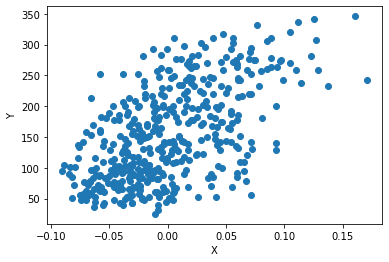

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets

# load data
d = datasets.load_diabetes()
X = d.data[:, 2]
Y = d.target

# draw original data
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### 1.2 Math principle
There are $N$ observation data：
$$
\mathbf{X} = \{x_1, x_2, ..., x_N \} \\
\mathbf{Y} = \{y_1, y_2, ..., y_N \}
$$
Among them $\mathbf{X}$ is the independent variable，$\mathbf{Y}$is the dependent variable。

We hope that we can find a model to explain these data, assuming that we can use the most simple linear model to fit data:
$$
y = ax + b
$$
Then the problem will be transfer to solve parameter $a$, $b$ can make the output of the model have relatively small error with the observation data as far as possible

How to construct function to evaluate the error between model output and observation data is a key problem, here we use the sum suqare between observation data and model output as the evaluate funciton(also called Loss function)

$$
L = \sum_{i=1}^{N} (y_i - a x_i - b)^2 \\
L = \sum_{i=1}^{N} \{y_i - (a x_i + b)\}^2
$$

To minimize loss function, we can get the parameter of model:
$$
\frac{\partial L}{\partial a} = -2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i \\
\frac{\partial L}{\partial b} = -2 \sum_{i=1}^{N} (y_i - a x_i - b)
$$
When the partial derivative is 0, the error function is the minimum, so we can get:
$$
-2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i = 0 \\
-2 \sum_{i=1}^{N} (y_i - a x_i - b) = 0 \\
$$
Adjust the order of upper formula we can get:
$$
a \sum x_i^2 + b \sum x_i = \sum y_i x_i \\
a \sum x_i + b N = \sum y_i
$$\
By solving two dimensional system of first order equations, we can get the optimal parameter for the model.

### 1.3 Program solving

a = 949.435260, b = 152.133484


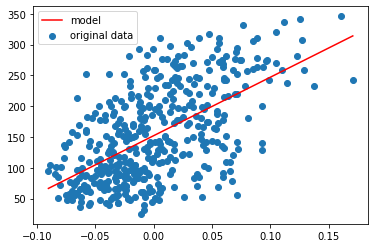

In [2]:
N = X.shape[0]

S_X2 = np.sum(X*X)
S_X  = np.sum(X)
S_XY = np.sum(X*Y)
S_Y  = np.sum(Y)

A1 = np.array([[S_X2, S_X], 
               [S_X, N]])
B1 = np.array([S_XY, S_Y])
# numpy.linalg module contains function including linear algebra.
#Using this module, we can calculate inverse matrix and eigen values, solve linear system of equation and caluculate determinant.
coeff = np.linalg.inv(A1).dot(B1)

print('a = %f, b = %f' % (coeff[0], coeff[1]))

x_min = np.min(X)
x_max = np.max(X)
y_min = coeff[0] * x_min + coeff[1]
y_max = coeff[0] * x_max + coeff[1]

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## 2. How to calculate model parameters using iteration method

When we have too much datas or complicated model, it is difficult to use analytic approach calculate the model parameters. Therefore, the more common way is to approximate the parameter of model using iteration.

### 2.1 Grediant descent method
In the program of machine learning, for many supervised model, it is needed to build loss function, the next step is to optimise the loss function by optimise algorithm in order to find the optimal parameter.
In the optimization algorithm that solving machine learining parameters, the commonly used method is the optimization algorithm based on Gradient Descent.

There are many advantages in Gradient Descent method, the main advantage is that when using Gradient Descent method, we only need to calcualte the first grade deverative of loss function, which has a little computational cost. Therefore, Gradient Descent can be applied in many large dataset. The meaning of Gradient Descent method is to use the current gredient direction to find new iteration point.

The basic method of Gradient Descent method is analogous to a descent down a mountain. Assume a scenario: a man was trapped in a mountain, they need to come down from the mountain(i.e. find the lowest point of the moutain, which is the valley). However, beacuse the frog is very dense at the moutain and cause a low visibility. Therefore, the path down the mountain is uncertain, he must use the message that around himself to find the path down the moutain. At this time, he can use Grediant Descent method to help himself down the mountain. To be specifically, based on his current position, ook for the steepest part of this position and then walk towards the down height of the mountain. In the same way, if our goal is to climb the mountain, which is to climb to the top, then we should go upwards toward the steepest direction of the moutain. After a short distance, we can use the same method repeatly and reach the valley successfully in the end.

We can assume the steepest place of the moutain can not be observed immediately and we need a more complicate tool to measure. At the same time, this person happens to have the ability to measure the steepest direction of the moutain. Therefore, after a little distance, it is needed to take a time to measure the steepest direction in current place, which is preety time consuming. In order to arrive at the foot of the moutain, we need to reduce the times to measure the direction as much as possible. This is a dilemma, if we measure frequently, we can assure the direction to go down the mountain is absolutely correct, but it is time consuming, and if measured too little, there is a risk of going off course. So you need to find a suitable frequency to measure the direction of the mountain, to make sure that the direction of the mountain is not wrong, but not too time-consuming!

![gradient_descent](images/gradient_descent.png)

As shown in upper graph, we can get the local optimal solution. x, y represent $\theta_0$ and $\theta_1$, z direction represent cost function, it is obvious that when the start point is different, the convergence point that arrived in the end may be different. However, if the cost function is in bowl shape, then we may get the same convergence point.

For an loss function
$$
L = \sum_{i=1}^{N} (y_i - a x_i - b)^2
$$

The strage that we used to update is:
$$
\theta^1 = \theta^0 - \alpha \triangledown L(\theta)
$$
Among them $\theta$ represent the parameter in the model, such as $a$,$b$

The meaning of this formula is: $L$ is a function about $\theta$, we are at currently at point $\theta_0$, if we need t go from this point to the minimum point of L, which is the foot of the mountain. Firstly, we need to determine the current direction, which is the　inverse direction of the grediant, then we go a step size of distance  $\alpha$, after finish this ditance, we reached at point $\theta_1$.

Here are some commonly appeared question:


* **What is the meaning of $\alpha$？**
$\alpha$ are called learning rate or step size in Grediant descent method, this means that we can control every step distance to make sure lower step to avoid misssing the lowest point. At the same time we need to make sure you don't walk so slowly that the sun goes down before you reach the foot of the mountain. So the choice of $\alpha$is often important in gradient descent.

![gd_stepsize](images/gd_stepsize.png)

* **Why the grediant need to multiply a minus sign？**

A minus sign before means towards the inverse direction of grediant. The direction of grediant is actually the direction in which the function rises most rapidly at this point, while we need to  go according to the direction decrese most whcih is the inverse direction of the gredient, therefore we need to add minus sign.




### 2.2 The sample code

epoch    0: loss = 4303817.496892, a = 2.826518, b = 90.332322
epoch    1: loss = 2886806.756007, a = 4.689320, b = 127.204624
epoch    2: loss = 2650260.562182, a = 6.564882, b = 142.423411
epoch    3: loss = 2610244.478756, a = 8.443497, b = 148.704446
epoch    4: loss = 2601826.873313, a = 10.321163, b = 151.296317
epoch    5: loss = 2598022.583256, a = 12.196235, b = 152.365440
epoch    6: loss = 2594693.583475, a = 14.068035, b = 152.806033
epoch    7: loss = 2591324.277053, a = 15.936290, b = 152.987193
epoch    8: loss = 2587904.879022, a = 17.800890, b = 153.061271
epoch    9: loss = 2584465.875668, a = 19.661796, b = 153.091151
epoch   10: loss = 2581025.689621, a = 21.518994, b = 153.102788
epoch   11: loss = 2577592.886376, a = 23.372484, b = 153.106897
epoch   12: loss = 2574171.135769, a = 25.222270, b = 153.107901
epoch   13: loss = 2570761.947715, a = 27.068358, b = 153.107623
epoch   14: loss = 2567365.917653, a = 28.910755, b = 153.106819
epoch   15: loss = 2563983.260

epoch  223: loss = 2087292.973899, a = 343.261047, b = 152.906306
epoch  224: loss = 2085826.827634, a = 344.471164, b = 152.905533
epoch  225: loss = 2084366.533687, a = 345.678860, b = 152.904762
epoch  226: loss = 2082912.068689, a = 346.884142, b = 152.903992
epoch  227: loss = 2081463.409360, a = 348.087014, b = 152.903224
epoch  228: loss = 2080020.532516, a = 349.287480, b = 152.902457
epoch  229: loss = 2078583.415065, a = 350.485545, b = 152.901692
epoch  230: loss = 2077152.034007, a = 351.681215, b = 152.900928
epoch  231: loss = 2075726.366435, a = 352.874494, b = 152.900166
epoch  232: loss = 2074306.389530, a = 354.065387, b = 152.899405
epoch  233: loss = 2072892.080568, a = 355.253899, b = 152.898646
epoch  234: loss = 2071483.416915, a = 356.440033, b = 152.897889
epoch  235: loss = 2070080.376026, a = 357.623796, b = 152.897133
epoch  236: loss = 2068682.935446, a = 358.805192, b = 152.896378
epoch  237: loss = 2067291.072812, a = 359.984226, b = 152.895625
epoch  238

epoch  419: loss = 1887694.841269, a = 539.645337, b = 152.780876
epoch  420: loss = 1887025.275578, a = 540.462750, b = 152.780354
epoch  421: loss = 1886358.381359, a = 541.278529, b = 152.779833
epoch  422: loss = 1885694.147947, a = 542.092676, b = 152.779313
epoch  423: loss = 1885032.564717, a = 542.905195, b = 152.778794
epoch  424: loss = 1884373.621089, a = 543.716089, b = 152.778276
epoch  425: loss = 1883717.306523, a = 544.525362, b = 152.777759
epoch  426: loss = 1883063.610524, a = 545.333017, b = 152.777244
epoch  427: loss = 1882412.522636, a = 546.139056, b = 152.776729
epoch  428: loss = 1881764.032446, a = 546.943484, b = 152.776215
epoch  429: loss = 1881118.129583, a = 547.746303, b = 152.775702
epoch  430: loss = 1880474.803717, a = 548.547517, b = 152.775190
epoch  431: loss = 1879834.044558, a = 549.347128, b = 152.774680
epoch  432: loss = 1879195.841860, a = 550.145141, b = 152.774170
epoch  433: loss = 1878560.185416, a = 550.941558, b = 152.773661
epoch  434

epoch  601: loss = 1800939.537143, a = 664.452299, b = 152.701163
epoch  602: loss = 1800616.027992, a = 665.020140, b = 152.700800
epoch  603: loss = 1800293.808821, a = 665.586845, b = 152.700438
epoch  604: loss = 1799972.874480, a = 666.152416, b = 152.700077
epoch  605: loss = 1799653.219842, a = 666.716857, b = 152.699716
epoch  606: loss = 1799334.839799, a = 667.280169, b = 152.699356
epoch  607: loss = 1799017.729262, a = 667.842355, b = 152.698997
epoch  608: loss = 1798701.883166, a = 668.403416, b = 152.698639
epoch  609: loss = 1798387.296463, a = 668.963355, b = 152.698281
epoch  610: loss = 1798073.964127, a = 669.522175, b = 152.697924
epoch  611: loss = 1797761.881151, a = 670.079877, b = 152.697568
epoch  612: loss = 1797451.042549, a = 670.636464, b = 152.697213
epoch  613: loss = 1797141.443353, a = 671.191938, b = 152.696858
epoch  614: loss = 1796833.078618, a = 671.746302, b = 152.696504
epoch  615: loss = 1796525.943415, a = 672.299557, b = 152.696150
epoch  616

epoch  726: loss = 1769043.643754, a = 727.311805, b = 152.661014
epoch  727: loss = 1768847.287304, a = 727.753947, b = 152.660732
epoch  728: loss = 1768651.713380, a = 728.195205, b = 152.660450
epoch  729: loss = 1768456.918858, a = 728.635580, b = 152.660169
epoch  730: loss = 1768262.900630, a = 729.075075, b = 152.659888
epoch  731: loss = 1768069.655598, a = 729.513692, b = 152.659608
epoch  732: loss = 1767877.180675, a = 729.951431, b = 152.659328
epoch  733: loss = 1767685.472790, a = 730.388294, b = 152.659049
epoch  734: loss = 1767494.528882, a = 730.824285, b = 152.658771
epoch  735: loss = 1767304.345902, a = 731.259403, b = 152.658493
epoch  736: loss = 1767114.920814, a = 731.693651, b = 152.658216
epoch  737: loss = 1766926.250593, a = 732.127031, b = 152.657939
epoch  738: loss = 1766738.332229, a = 732.559544, b = 152.657663
epoch  739: loss = 1766551.162720, a = 732.991193, b = 152.657387
epoch  740: loss = 1766364.739080, a = 733.421978, b = 152.657112
epoch  741

epoch  950: loss = 1739911.440986, a = 807.205615, b = 152.609986
epoch  951: loss = 1739831.118877, a = 807.487996, b = 152.609806
epoch  952: loss = 1739751.116414, a = 807.769812, b = 152.609626
epoch  953: loss = 1739671.432323, a = 808.051065, b = 152.609446
epoch  954: loss = 1739592.065335, a = 808.331755, b = 152.609267
epoch  955: loss = 1739513.014184, a = 808.611884, b = 152.609088
epoch  956: loss = 1739434.277612, a = 808.891453, b = 152.608910
epoch  957: loss = 1739355.854363, a = 809.170463, b = 152.608732
epoch  958: loss = 1739277.743190, a = 809.448915, b = 152.608554
epoch  959: loss = 1739199.942847, a = 809.726810, b = 152.608376
epoch  960: loss = 1739122.452096, a = 810.004149, b = 152.608199
epoch  961: loss = 1739045.269701, a = 810.280934, b = 152.608022
epoch  962: loss = 1738968.394433, a = 810.557165, b = 152.607846
epoch  963: loss = 1738891.825068, a = 810.832844, b = 152.607670
epoch  964: loss = 1738815.560385, a = 811.107972, b = 152.607494
epoch  965

epoch 1174: loss = 1727987.120142, a = 858.231041, b = 152.577397
epoch 1175: loss = 1727954.210655, a = 858.411388, b = 152.577282
epoch 1176: loss = 1727921.431843, a = 858.591375, b = 152.577167
epoch 1177: loss = 1727888.783186, a = 858.771001, b = 152.577052
epoch 1178: loss = 1727856.264164, a = 858.950268, b = 152.576937
epoch 1179: loss = 1727823.874263, a = 859.129177, b = 152.576823
epoch 1180: loss = 1727791.612966, a = 859.307728, b = 152.576709
epoch 1181: loss = 1727759.479763, a = 859.485922, b = 152.576595
epoch 1182: loss = 1727727.474143, a = 859.663760, b = 152.576482
epoch 1183: loss = 1727695.595598, a = 859.841242, b = 152.576368
epoch 1184: loss = 1727663.843621, a = 860.018369, b = 152.576255
epoch 1185: loss = 1727632.217709, a = 860.195142, b = 152.576142
epoch 1186: loss = 1727600.717360, a = 860.371562, b = 152.576030
epoch 1187: loss = 1727569.342073, a = 860.547628, b = 152.575917
epoch 1188: loss = 1727538.091351, a = 860.723343, b = 152.575805
epoch 1189

epoch 1340: loss = 1723980.033566, a = 883.728363, b = 152.561112
epoch 1341: loss = 1723963.019276, a = 883.857724, b = 152.561029
epoch 1342: loss = 1723946.072383, a = 883.986826, b = 152.560947
epoch 1343: loss = 1723929.192619, a = 884.115670, b = 152.560864
epoch 1344: loss = 1723912.379717, a = 884.244256, b = 152.560782
epoch 1345: loss = 1723895.633411, a = 884.372586, b = 152.560700
epoch 1346: loss = 1723878.953436, a = 884.500658, b = 152.560618
epoch 1347: loss = 1723862.339528, a = 884.628475, b = 152.560537
epoch 1348: loss = 1723845.791425, a = 884.756036, b = 152.560455
epoch 1349: loss = 1723829.308864, a = 884.883341, b = 152.560374
epoch 1350: loss = 1723812.891585, a = 885.010393, b = 152.560293
epoch 1351: loss = 1723796.539328, a = 885.137190, b = 152.560212
epoch 1352: loss = 1723780.251834, a = 885.263733, b = 152.560131
epoch 1353: loss = 1723764.028847, a = 885.390024, b = 152.560050
epoch 1354: loss = 1723747.870109, a = 885.516062, b = 152.559970
epoch 1355

epoch 1543: loss = 1721602.802156, a = 905.329748, b = 152.547315
epoch 1544: loss = 1721595.188730, a = 905.415913, b = 152.547260
epoch 1545: loss = 1721587.605335, a = 905.501906, b = 152.547205
epoch 1546: loss = 1721580.051852, a = 905.587727, b = 152.547150
epoch 1547: loss = 1721572.528163, a = 905.673376, b = 152.547095
epoch 1548: loss = 1721565.034149, a = 905.758854, b = 152.547041
epoch 1549: loss = 1721557.569692, a = 905.844161, b = 152.546986
epoch 1550: loss = 1721550.134675, a = 905.929298, b = 152.546932
epoch 1551: loss = 1721542.728982, a = 906.014264, b = 152.546878
epoch 1552: loss = 1721535.352495, a = 906.099060, b = 152.546824
epoch 1553: loss = 1721528.005099, a = 906.183687, b = 152.546770
epoch 1554: loss = 1721520.686678, a = 906.268145, b = 152.546716
epoch 1555: loss = 1721513.397118, a = 906.352433, b = 152.546662
epoch 1556: loss = 1721506.136304, a = 906.436553, b = 152.546608
epoch 1557: loss = 1721498.904121, a = 906.520505, b = 152.546554
epoch 1558

epoch 1688: loss = 1720760.583133, a = 916.184812, b = 152.540382
epoch 1689: loss = 1720756.285922, a = 916.249271, b = 152.540341
epoch 1690: loss = 1720752.005590, a = 916.313601, b = 152.540300
epoch 1691: loss = 1720747.742072, a = 916.377802, b = 152.540259
epoch 1692: loss = 1720743.495299, a = 916.441875, b = 152.540218
epoch 1693: loss = 1720739.265205, a = 916.505819, b = 152.540177
epoch 1694: loss = 1720735.051726, a = 916.569636, b = 152.540136
epoch 1695: loss = 1720730.854794, a = 916.633325, b = 152.540095
epoch 1696: loss = 1720726.674344, a = 916.696887, b = 152.540055
epoch 1697: loss = 1720722.510311, a = 916.760321, b = 152.540014
epoch 1698: loss = 1720718.362630, a = 916.823629, b = 152.539974
epoch 1699: loss = 1720714.231237, a = 916.886810, b = 152.539934
epoch 1700: loss = 1720710.116066, a = 916.949865, b = 152.539893
epoch 1701: loss = 1720706.017053, a = 917.012794, b = 152.539853
epoch 1702: loss = 1720701.934135, a = 917.075597, b = 152.539813
epoch 1703

epoch 1899: loss = 1720142.893953, a = 927.289560, b = 152.533289
epoch 1900: loss = 1720141.014763, a = 927.331812, b = 152.533262
epoch 1901: loss = 1720139.142892, a = 927.373981, b = 152.533235
epoch 1902: loss = 1720137.278311, a = 927.416065, b = 152.533209
epoch 1903: loss = 1720135.420990, a = 927.458065, b = 152.533182
epoch 1904: loss = 1720133.570901, a = 927.499981, b = 152.533155
epoch 1905: loss = 1720131.728016, a = 927.541813, b = 152.533128
epoch 1906: loss = 1720129.892306, a = 927.583561, b = 152.533102
epoch 1907: loss = 1720128.063742, a = 927.625226, b = 152.533075
epoch 1908: loss = 1720126.242298, a = 927.666808, b = 152.533048
epoch 1909: loss = 1720124.427944, a = 927.708306, b = 152.533022
epoch 1910: loss = 1720122.620652, a = 927.749721, b = 152.532995
epoch 1911: loss = 1720120.820396, a = 927.791054, b = 152.532969
epoch 1912: loss = 1720119.027146, a = 927.832304, b = 152.532943
epoch 1913: loss = 1720117.240876, a = 927.873472, b = 152.532916
epoch 1914

epoch 2063: loss = 1719914.638078, a = 933.202435, b = 152.529513
epoch 2064: loss = 1719913.644301, a = 933.232864, b = 152.529493
epoch 2065: loss = 1719912.654359, a = 933.263232, b = 152.529474
epoch 2066: loss = 1719911.668235, a = 933.293540, b = 152.529455
epoch 2067: loss = 1719910.685915, a = 933.323787, b = 152.529435
epoch 2068: loss = 1719909.707384, a = 933.353973, b = 152.529416
epoch 2069: loss = 1719908.732628, a = 933.384099, b = 152.529397
epoch 2070: loss = 1719907.761630, a = 933.414165, b = 152.529378
epoch 2071: loss = 1719906.794377, a = 933.444170, b = 152.529358
epoch 2072: loss = 1719905.830853, a = 933.474116, b = 152.529339
epoch 2073: loss = 1719904.871045, a = 933.504002, b = 152.529320
epoch 2074: loss = 1719903.914938, a = 933.533828, b = 152.529301
epoch 2075: loss = 1719902.962516, a = 933.563594, b = 152.529282
epoch 2076: loss = 1719902.013766, a = 933.593301, b = 152.529263
epoch 2077: loss = 1719901.068673, a = 933.622949, b = 152.529244
epoch 2078

epoch 2297: loss = 1719760.996032, a = 938.893474, b = 152.525878
epoch 2298: loss = 1719760.590557, a = 938.912523, b = 152.525866
epoch 2299: loss = 1719760.186616, a = 938.931534, b = 152.525854
epoch 2300: loss = 1719759.784204, a = 938.950507, b = 152.525842
epoch 2301: loss = 1719759.383315, a = 938.969442, b = 152.525829
epoch 2302: loss = 1719758.983942, a = 938.988339, b = 152.525817
epoch 2303: loss = 1719758.586080, a = 939.007198, b = 152.525805
epoch 2304: loss = 1719758.189723, a = 939.026019, b = 152.525793
epoch 2305: loss = 1719757.794866, a = 939.044803, b = 152.525781
epoch 2306: loss = 1719757.401501, a = 939.063549, b = 152.525769
epoch 2307: loss = 1719757.009624, a = 939.082258, b = 152.525757
epoch 2308: loss = 1719756.619228, a = 939.100929, b = 152.525745
epoch 2309: loss = 1719756.230309, a = 939.119563, b = 152.525734
epoch 2310: loss = 1719755.842860, a = 939.138160, b = 152.525722
epoch 2311: loss = 1719755.456875, a = 939.156719, b = 152.525710
epoch 2312

epoch 2492: loss = 1719704.887748, a = 941.971931, b = 152.523912
epoch 2493: loss = 1719704.692623, a = 941.984824, b = 152.523903
epoch 2494: loss = 1719704.498220, a = 941.997691, b = 152.523895
epoch 2495: loss = 1719704.304537, a = 942.010533, b = 152.523887
epoch 2496: loss = 1719704.111569, a = 942.023348, b = 152.523879
epoch 2497: loss = 1719703.919315, a = 942.036138, b = 152.523871
epoch 2498: loss = 1719703.727771, a = 942.048903, b = 152.523863
epoch 2499: loss = 1719703.536936, a = 942.061642, b = 152.523854
epoch 2500: loss = 1719703.346805, a = 942.074356, b = 152.523846
epoch 2501: loss = 1719703.157378, a = 942.087044, b = 152.523838
epoch 2502: loss = 1719702.968650, a = 942.099706, b = 152.523830
epoch 2503: loss = 1719702.780619, a = 942.112344, b = 152.523822
epoch 2504: loss = 1719702.593283, a = 942.124956, b = 152.523814
epoch 2505: loss = 1719702.406639, a = 942.137543, b = 152.523806
epoch 2506: loss = 1719702.220684, a = 942.150105, b = 152.523798
epoch 2507

epoch 2724: loss = 1719674.346128, a = 944.367064, b = 152.522382
epoch 2725: loss = 1719674.262274, a = 944.375168, b = 152.522377
epoch 2726: loss = 1719674.178719, a = 944.383255, b = 152.522372
epoch 2727: loss = 1719674.095462, a = 944.391326, b = 152.522366
epoch 2728: loss = 1719674.012501, a = 944.399381, b = 152.522361
epoch 2729: loss = 1719673.929835, a = 944.407420, b = 152.522356
epoch 2730: loss = 1719673.847464, a = 944.415443, b = 152.522351
epoch 2731: loss = 1719673.765385, a = 944.423450, b = 152.522346
epoch 2732: loss = 1719673.683599, a = 944.431440, b = 152.522341
epoch 2733: loss = 1719673.602103, a = 944.439415, b = 152.522336
epoch 2734: loss = 1719673.520897, a = 944.447374, b = 152.522331
epoch 2735: loss = 1719673.439980, a = 944.455317, b = 152.522326
epoch 2736: loss = 1719673.359351, a = 944.463244, b = 152.522321
epoch 2737: loss = 1719673.279008, a = 944.471155, b = 152.522315
epoch 2738: loss = 1719673.198950, a = 944.479050, b = 152.522310
epoch 2739

epoch 2988: loss = 1719659.887278, a = 946.030483, b = 152.521320
epoch 2989: loss = 1719659.853724, a = 946.035261, b = 152.521316
epoch 2990: loss = 1719659.820283, a = 946.040028, b = 152.521313
epoch 2991: loss = 1719659.786954, a = 946.044786, b = 152.521310
epoch 2992: loss = 1719659.753737, a = 946.049535, b = 152.521307
epoch 2993: loss = 1719659.720631, a = 946.054274, b = 152.521304
epoch 2994: loss = 1719659.687636, a = 946.059004, b = 152.521301
epoch 2995: loss = 1719659.654752, a = 946.063724, b = 152.521298
epoch 2996: loss = 1719659.621978, a = 946.068434, b = 152.521295
epoch 2997: loss = 1719659.589314, a = 946.073136, b = 152.521292
epoch 2998: loss = 1719659.556759, a = 946.077828, b = 152.521289
epoch 2999: loss = 1719659.524314, a = 946.082510, b = 152.521286


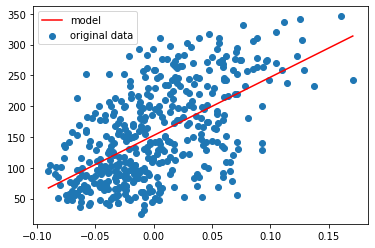

In [3]:
n_epoch = 3000          # epoch size
a, b = 1, 1             # initial parameters
epsilon = 0.001         # learning rate

for i in range(n_epoch):
    for j in range(N):
        a = a + epsilon*2*(Y[j] - a*X[j] - b)*X[j]
        b = b + epsilon*2*(Y[j] - a*X[j] - b)

    L = 0
    for j in range(N):
        L = L + (Y[j]-a*X[j]-b)**2
    print("epoch %4d: loss = %f, a = %f, b = %f" % (i, L, a, b))
    
x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## 3. How to achieve visible iteration process?

<IPython.core.display.Javascript object>


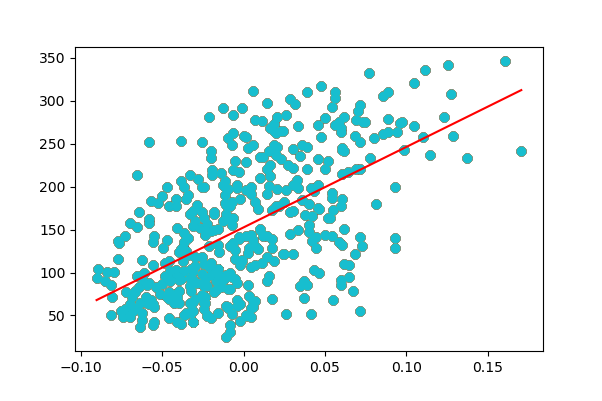

In [7]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation

n_epoch = 3000          # epoch size
a, b = 1, 1             # initial parameters
epsilon = 0.001         # learning rate

fig = plt.figure()
imgs = []

for i in range(n_epoch):
    for j in range(N):
        a = a + epsilon*2*(Y[j] - a*X[j] - b)*X[j]
        b = b + epsilon*2*(Y[j] - a*X[j] - b)

    L = 0
    for j in range(N):
        L = L + (Y[j]-a*X[j]-b)**2
    #print("epoch %4d: loss = %f, a = %f, b = %f" % (i, L, a, b))
    
    if i % 50 == 0:
        x_min = np.min(X)
        x_max = np.max(X)
        y_min = a * x_min + b
        y_max = a * x_max + b

        img = plt.scatter(X, Y, label='original data')
        img = plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
        imgs.append(img)
        
ani = animation.ArtistAnimation(fig, imgs)
plt.show()

## 4. How to use batch update?

If some data have relatively large error(abnormal data), which mean a data for each update will leads to inaccurate. At the same time, using only one data at a time to calculate the update also leads to low computational efficiency.



* [A few form for Gradient descent method](https://blog.csdn.net/u010402786/article/details/51188876)

## 5. How to fit multiple polynomial function？

Assume that we need to design a ballistic missile defense system, by observing the flight path of the missile, the flight path of the missile in the future can be predicted so as to complete the mission of destruction. According to physics, it can be known that the model is:

$$
y = at^2 + bt + c
$$
There are three model parameters $a, b, c$ that we need to solve.

The definitation of loss function is:

$$
L = \sum_{i=1}^N (y_i - at^2 - bt - c)^2
$$


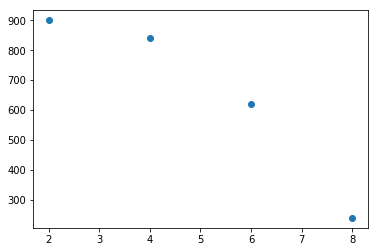

In [11]:
%matplotlib inline

t = np.array([2, 4, 6, 8])
#t = np.linspace(0, 10)

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc


plt.scatter(t, y)
plt.show()

### 5.1 How to get update term?

$$
L = \sum_{i=1}^N (y_i - at^2 - bt - c)^2
$$

\begin{eqnarray}
\frac{\partial L}{\partial a} & = & - 2\sum_{i=1}^N (y_i - at^2 - bt -c) t^2 \\
\frac{\partial L}{\partial b} & = & - 2\sum_{i=1}^N (y_i - at^2 - bt -c) t \\
\frac{\partial L}{\partial c} & = & - 2\sum_{i=1}^N (y_i - at^2 - bt -c)
\end{eqnarray}

## 6. How to use sklearn to solve linear problem？


a = 949.435260, b = 152.133484


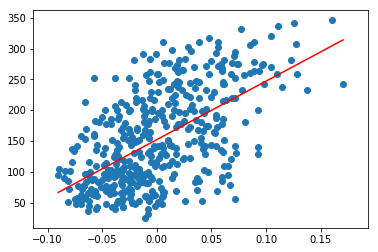

In [12]:
from sklearn import linear_model

# load data
d = datasets.load_diabetes()

X = d.data[:, np.newaxis, 2]
Y = d.target

# create regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

a, b = regr.coef_, regr.intercept_
print("a = %f, b = %f" % (a, b))

x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y)
plt.plot([x_min, x_max], [y_min, y_max], 'r')
plt.show()

## 7. How to use sklearn fit  polynomial function？

In [10]:
# Fitting polynomial functions

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

t = np.array([2, 4, 6, 8])

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(t[:, np.newaxis], y)
model.named_steps['linear'].coef_


array([800.,  90., -20.])